In [199]:
import torch
print("torch version: ", torch.__version__)

torch version:  2.0.0+cu117


In [200]:
class Namespace:
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)

args = Namespace(batch_size=1, crop=True, cross=False, dataset="vigor", dim=1000, resume="./result_vigor/model_best.pth.tar", 
                 sat_res=400, fov=0, workers=8)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


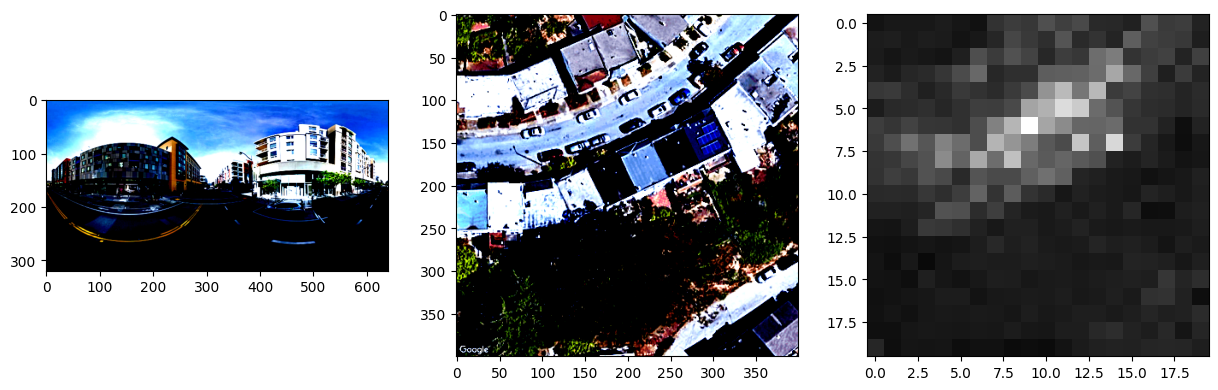

In [201]:
from dataset.VIGOR import VIGOR
import matplotlib.pyplot as plt

val_reference_dataset = VIGOR(mode='test_reference', same_area=(not args.cross), args=args, root="/dev/shm/VIGOR-SF")
val_query_dataset = VIGOR(mode='test_query', same_area=(not args.cross), args=args, root="/dev/shm/VIGOR-SF")

val_reference_loader = iter(torch.utils.data.DataLoader(val_reference_dataset, batch_size=args.batch_size, shuffle=False, num_workers=args.workers, pin_memory=True))
val_query_loader = iter(torch.utils.data.DataLoader(val_query_dataset,batch_size=args.batch_size, shuffle=False, num_workers=args.workers, pin_memory=True))

for _ in range(0):
    _, _, _ = next(val_reference_loader)
    _, _, _ = next(val_query_loader)

reference_images, reference_indexes, reference_atten = next(val_reference_loader)
query_images, query_indexes, query_labels = next(val_query_loader)

f, axarr = plt.subplots(1, 3, figsize=(15, 15))
axarr[0].imshow(torch.einsum('cwh->whc', query_images[0])) 
axarr[1].imshow(torch.einsum('cwh->whc', reference_images[0]))
axarr[2].imshow(torch.einsum('cwh->whc', reference_atten[0]))

In [202]:
import torchvision.transforms as T
ToPILImage = T.ToPILImage()
PILToTensor = T.PILToTensor()

mask = torch.where(reference_atten[0] > 0.25, 1.0, 0.0).cpu()
img = ToPILImage(mask)
img = img.resize((400, 400))
mask = PILToTensor(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


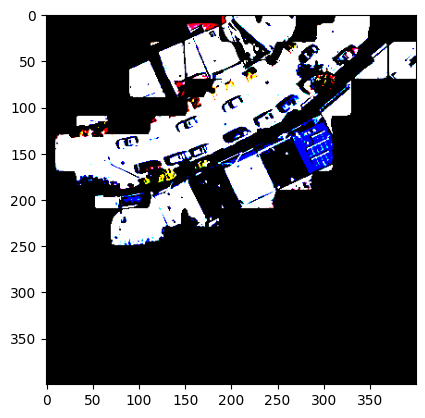

In [203]:
Y = reference_images[0] * mask
plt.imshow(torch.einsum('cwh->whc', Y))